In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load data
train_df = pd.read_csv("../data/train_data.csv")
test_df = pd.read_csv("../data/test_data.csv")
Weather_data = pd.concat([train_df, test_df], ignore_index=True)
print("Weather_data has been combined, due to added features")

Weather_data has been combined, due to added features


In [6]:
#view the data
df = Weather_data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55661 entries, 0 to 55660
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  55661 non-null  object 
 1   Location              55661 non-null  object 
 2   MinTemp               55661 non-null  float64
 3   MaxTemp               55661 non-null  float64
 4   Rainfall              55661 non-null  float64
 5   Evaporation           55661 non-null  float64
 6   Sunshine              55661 non-null  float64
 7   WindGustDir           55661 non-null  object 
 8   WindGustSpeed         55661 non-null  float64
 9   WindDir9am            55661 non-null  object 
 10  WindDir3pm            55661 non-null  object 
 11  WindSpeed9am          55661 non-null  float64
 12  WindSpeed3pm          55661 non-null  float64
 13  Humidity9am           55661 non-null  float64
 14  Humidity3pm           55661 non-null  float64
 15  Pressure9am        

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm_lag1,Rainfall_roll3,Temp3pm_roll3,Month,DayOfYear,Day_sin,Day_cos,TempHumidInteraction,DayAvgTemp,TempCategory
0,2015-07-28,Watsonia,7.3,14.6,0.0,1.8,8.1,W,24.0,WSW,...,59.0,1.200000,10.833333,7,209,-0.440519,-0.897743,850.0,10.95,Very Cold
1,2013-12-13,AliceSprings,14.2,34.7,0.0,12.0,13.4,S,48.0,E,...,14.0,0.000000,27.933333,12,347,-0.304921,0.952378,267.2,24.45,Very Warm
2,2016-10-17,MelbourneAirport,6.2,18.4,7.6,2.2,9.4,NW,43.0,W,...,48.0,2.533333,19.666667,10,291,-0.956235,0.292600,660.1,12.30,Cold
3,2010-06-11,SydneyAirport,6.4,18.0,0.0,3.2,9.8,WSW,43.0,NW,...,39.0,0.000000,16.433333,6,162,0.345612,-0.938377,653.6,12.20,Cold
4,2010-05-16,Townsville,17.7,27.8,0.0,6.0,7.7,E,35.0,SE,...,46.0,0.000000,26.066667,5,136,0.717677,-0.696376,1683.5,22.75,Warm


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55661 entries, 0 to 55660
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  55661 non-null  object 
 1   Location              55661 non-null  object 
 2   MinTemp               55661 non-null  float64
 3   MaxTemp               55661 non-null  float64
 4   Rainfall              55661 non-null  float64
 5   Evaporation           55661 non-null  float64
 6   Sunshine              55661 non-null  float64
 7   WindGustDir           55661 non-null  object 
 8   WindGustSpeed         55661 non-null  float64
 9   WindDir9am            55661 non-null  object 
 10  WindDir3pm            55661 non-null  object 
 11  WindSpeed9am          55661 non-null  float64
 12  WindSpeed3pm          55661 non-null  float64
 13  Humidity9am           55661 non-null  float64
 14  Humidity3pm           55661 non-null  float64
 15  Pressure9am        

In [9]:
#target variables
print("\nDistribution of 'TempCategory':")
print(df['TempCategory'].value_counts())
df['RainTomorrow_bin'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
print("\nDistribution of 'RainTomorrow':")
print(df['RainTomorrow'].value_counts())


Distribution of 'TempCategory':
TempCategory
Very Warm    14820
Warm         11194
Medium       10635
Cold          9804
Very Cold     9208
Name: count, dtype: int64

Distribution of 'RainTomorrow':
RainTomorrow
No     43424
Yes    12237
Name: count, dtype: int64


In [10]:
# Drop columns for feature
drop_cols = [
    "TempCategory", "RainTomorrow_bin",
    "DayAvgTemp", "MinTemp", "MaxTemp",
    "Temp3pm", "Temp9am"
]
features = df.drop(columns=drop_cols)
print(features)

             Date          Location  Rainfall  Evaporation  Sunshine  \
0      2015-07-28          Watsonia       0.0          1.8       8.1   
1      2013-12-13      AliceSprings       0.0         12.0      13.4   
2      2016-10-17  MelbourneAirport       7.6          2.2       9.4   
3      2010-06-11     SydneyAirport       0.0          3.2       9.8   
4      2010-05-16        Townsville       0.0          6.0       7.7   
...           ...               ...       ...          ...       ...   
55656  2013-01-03            Sydney       0.0          5.6      12.4   
55657  2012-08-10            Sydney       0.0          5.0       3.8   
55658  2009-08-10           Mildura       0.0          3.6       0.6   
55659  2014-03-23     NorfolkIsland       0.0          3.6       9.4   
55660  2011-05-03            Darwin       0.0          4.0      11.0   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  \
0               W           24.0        WSW        SSW    

In [11]:
#Missing values
missing = features.isnull().mean() * 100
missing = missing.sort_values(ascending=False)
print("\nPercentage of missing values per feature:")
print(missing)#none


Percentage of missing values per feature:
Date                    0.0
Cloud9am                0.0
Day_cos                 0.0
Day_sin                 0.0
DayOfYear               0.0
Month                   0.0
Temp3pm_roll3           0.0
Rainfall_roll3          0.0
Humidity3pm_lag1        0.0
Rainfall_lag1           0.0
Temp3pm_lag1            0.0
RainTomorrow            0.0
RainToday               0.0
Cloud3pm                0.0
Pressure3pm             0.0
Location                0.0
Pressure9am             0.0
Humidity3pm             0.0
Humidity9am             0.0
WindSpeed3pm            0.0
WindSpeed9am            0.0
WindDir3pm              0.0
WindDir9am              0.0
WindGustSpeed           0.0
WindGustDir             0.0
Sunshine                0.0
Evaporation             0.0
Rainfall                0.0
TempHumidInteraction    0.0
dtype: float64


In [12]:
#statictics for numerical columns
numeric_features = features.select_dtypes(include=[np.number])
desc = numeric_features.describe().T
print("\nDescriptive statistics for numeric features:")
print(desc)


Descriptive statistics for numeric features:
                        count         mean         std         min  \
Rainfall              55661.0     2.101432    6.978409    0.000000   
Evaporation           55661.0     5.488261    3.615830    0.000000   
Sunshine              55661.0     7.743010    3.754505    0.000000   
WindGustSpeed         55661.0    40.857674   13.322088    9.000000   
WindSpeed9am          55661.0    15.647994    8.296088    2.000000   
WindSpeed3pm          55661.0    19.782738    8.502180    2.000000   
Humidity9am           55661.0    65.831067   18.531235    1.000000   
Humidity3pm           55661.0    49.576490   20.207017    0.000000   
Pressure9am           55661.0  1017.234521    6.905534  980.500000   
Pressure3pm           55661.0  1014.786944    6.868475  977.100000   
Cloud9am              55661.0     4.237635    2.797713    0.000000   
Cloud3pm              55661.0     4.320080    2.648688    0.000000   
Temp3pm_lag1          55661.0    22.753165  

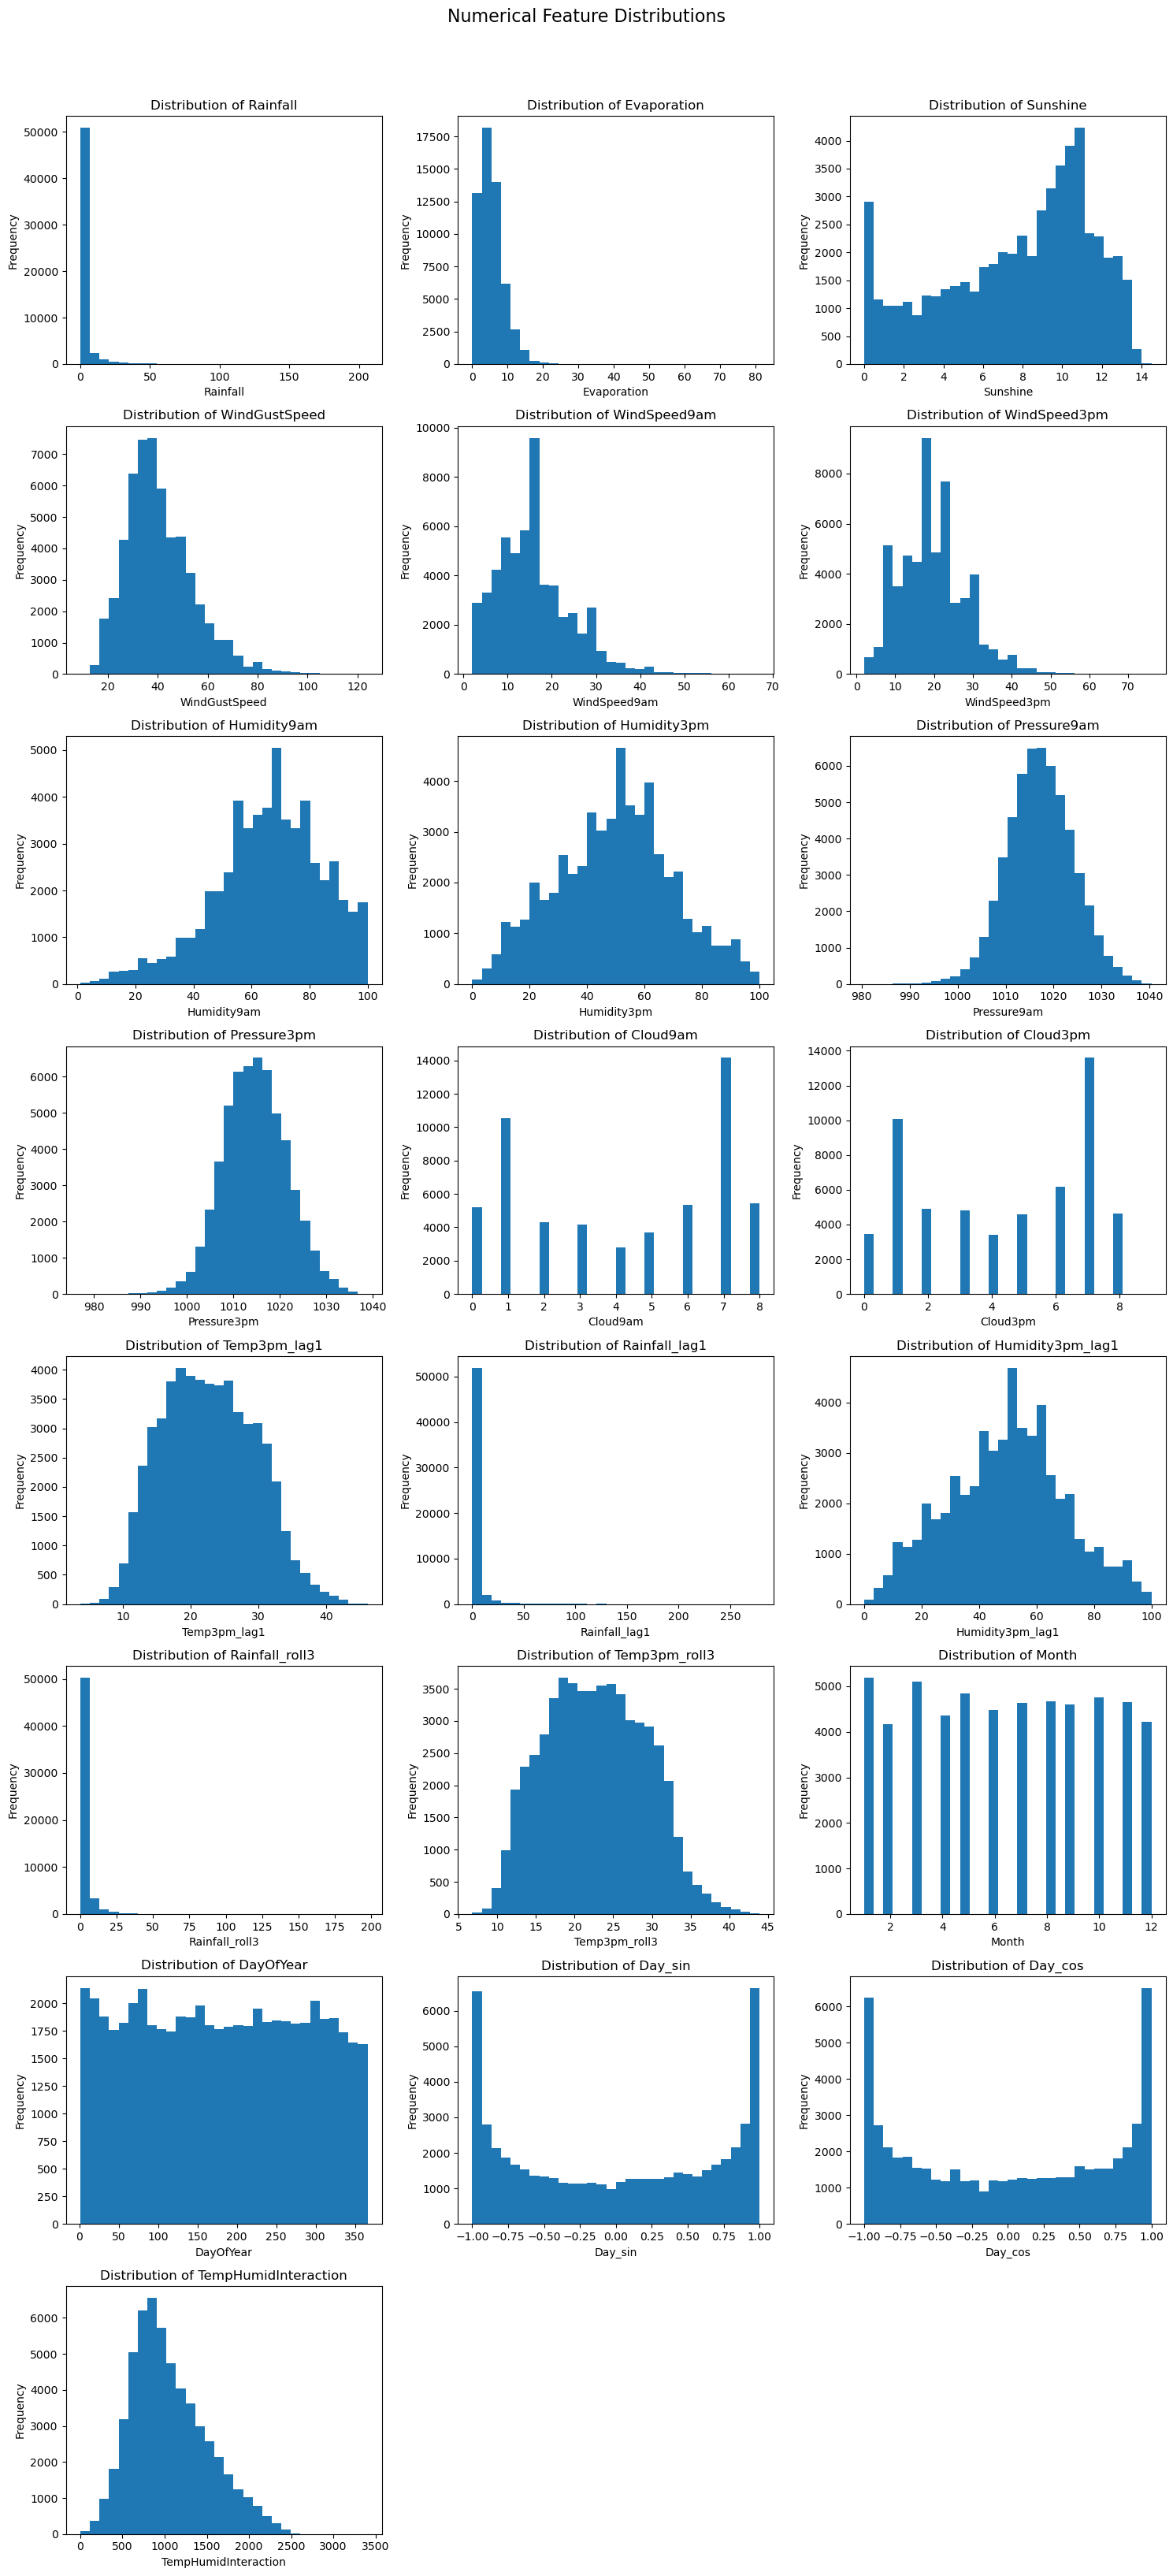

In [13]:

# Distribution of numerical features
# Histograms for numeric features
numeric_features = features.select_dtypes(include=[np.number])
cols = numeric_features.columns.tolist()
n = len(cols)
ncols = 3                          
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()
for ax, col in zip(axes, cols):
    ax.hist(numeric_features[col].dropna(), bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
for ax in axes[n:]:
    ax.axis('off')
plt.suptitle("Numerical Feature Distributions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


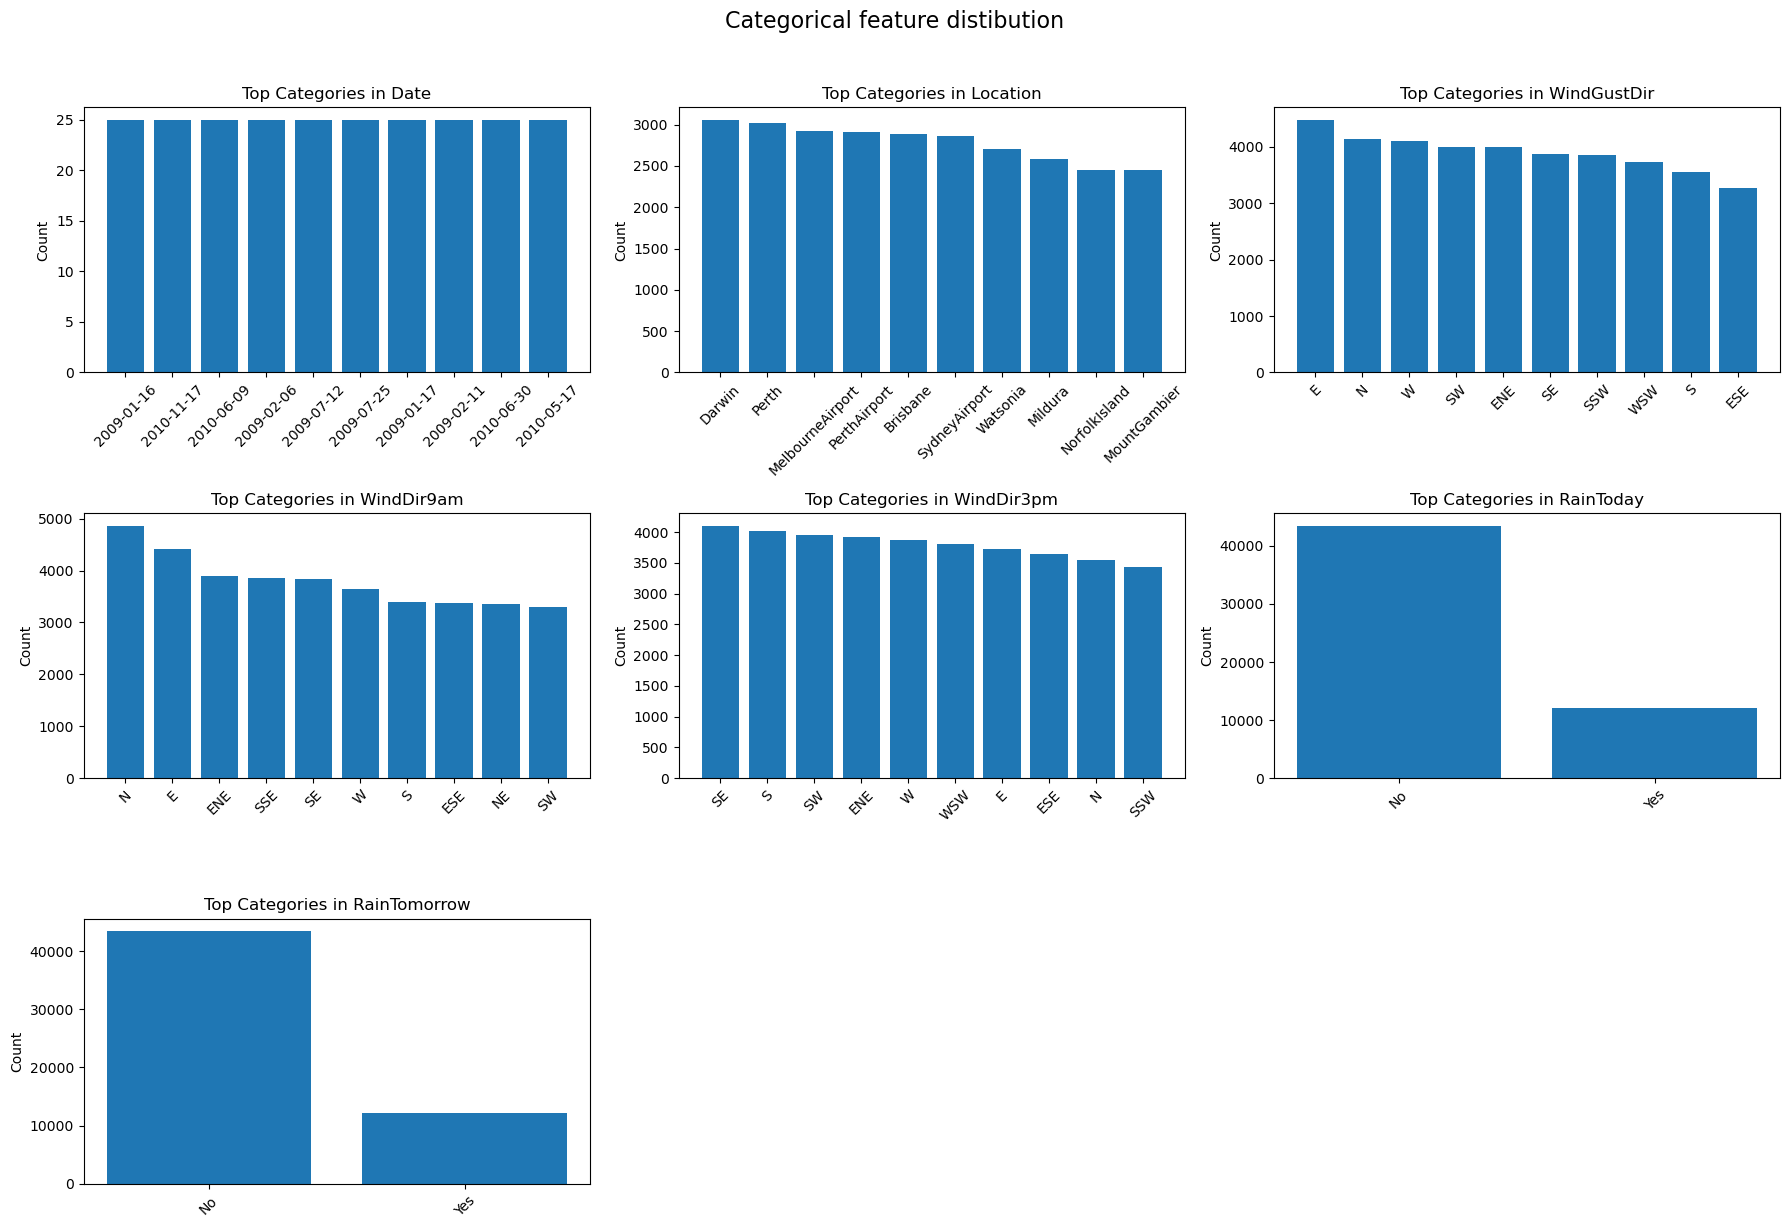

In [14]:
# Distribution of categorical features
#count bargraphs for categorical features
cat_features = features.select_dtypes(include=['object', 'category'])
cols = cat_features.columns.tolist()
n = len(cols)
ncols = 3
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()
#plotting
for ax, col in zip(axes, cols):
    counts = cat_features[col].value_counts().head(10)
    ax.bar(counts.index.astype(str), counts.values)
    ax.set_title(f'Top Categories in {col}')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
for ax in axes[n:]:
    ax.axis('off')
plt.suptitle("Categorical feature distibution", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Top positive correlations:
 Humidity9am             0.271612
TempHumidInteraction    0.301796
Cloud9am                0.324463
Cloud3pm                0.389071
Humidity3pm             0.455305
dtype: float64


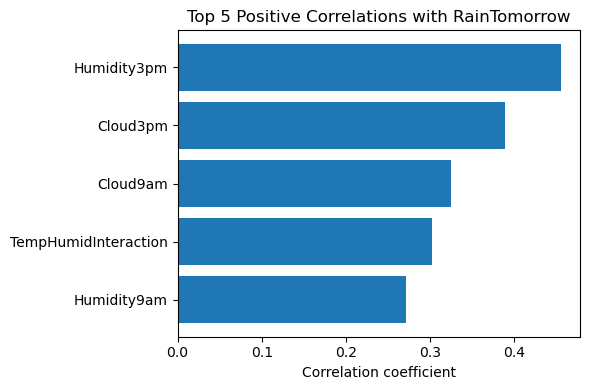

In [15]:
#Correlation with RainTomorrow
corrs = numeric_features.corrwith(df['RainTomorrow_bin']).sort_values()
# Plot top 5 positive and top 5 negative correlations
top_pos = corrs.tail(5)
print("Top positive correlations:\n", top_pos)  # sanity check
# Plot
plt.figure(figsize=(6, 4))
plt.barh(top_pos.index.astype(str), top_pos.values)
plt.title('Top 5 Positive Correlations with RainTomorrow')
plt.xlabel('Correlation coefficient')
plt.tight_layout()
plt.show()

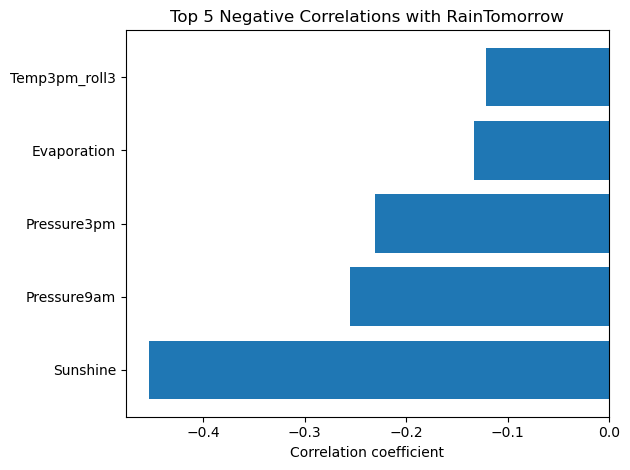

In [16]:
#negetive correlation plot
top_neg = corrs.head(5)
plt.figure()
plt.barh(top_neg.index.astype(str), top_neg.values)
plt.title('Top 5 Negative Correlations with RainTomorrow')
plt.xlabel('Correlation coefficient')
plt.tight_layout()
plt.show()

C:\Users\kekan\AppData\Local\Temp\ipykernel_38240\2032957345.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=categories)
C:\Users\kekan\AppData\Local\Temp\ipykernel_38240\2032957345.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=categories)
C:\Users\kekan\AppData\Local\Temp\ipykernel_38240\2032957345.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=categories)
C:\Users\kekan\AppData\Local\Temp\ipykernel_38240\2032957345.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matp

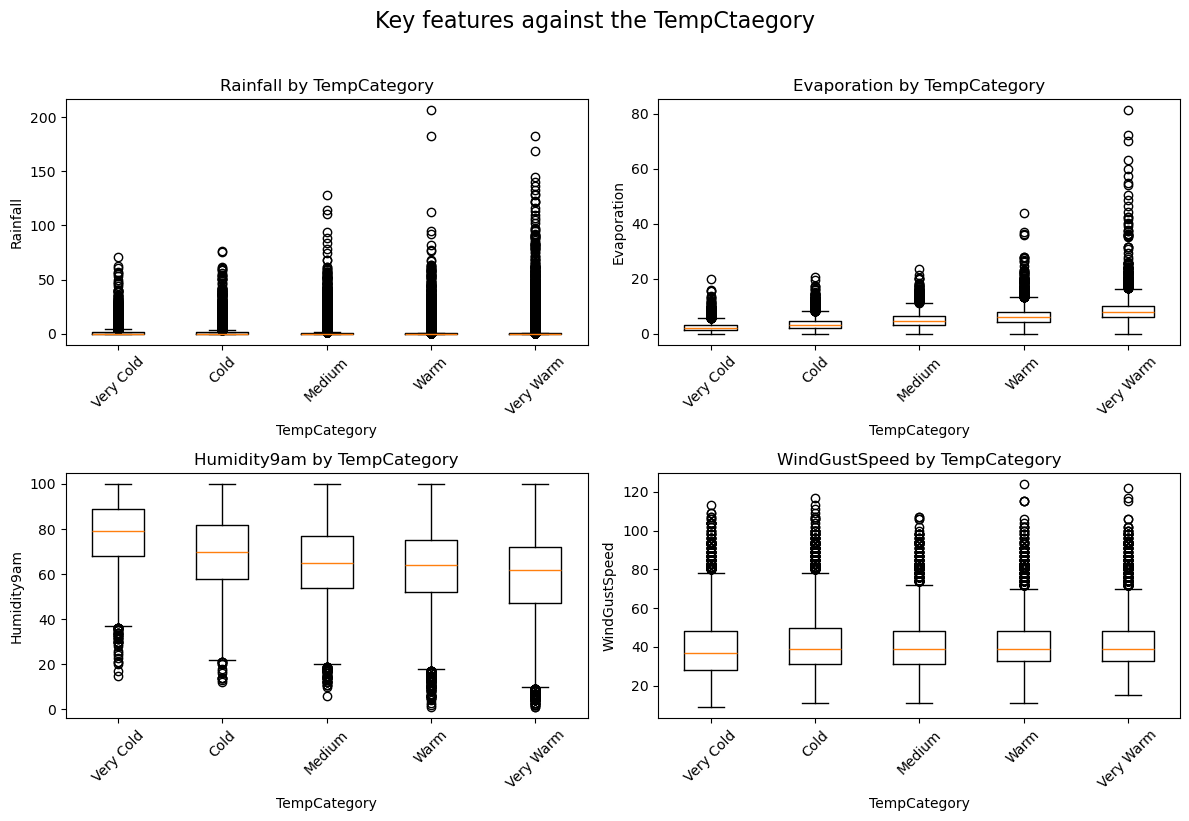

In [17]:
# 4. Boxplots of selected features by TempCategory
selected_feats = ['Rainfall', 'Evaporation', 'Humidity9am', 'WindGustSpeed']
categories    = ['Very Cold', 'Cold', 'Medium', 'Warm', 'Very Warm']
n = len(selected_feats)
ncols = 2
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()
for ax, col in zip(axes, selected_feats):
    if col not in df.columns:
        ax.axis('off')
        continue
    data = [df.loc[df['TempCategory'] == cat, col].dropna()
            for cat in categories]
    ax.boxplot(data, labels=categories)
    ax.set_title(f'{col} by TempCategory')
    ax.set_xlabel('TempCategory')
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)
for ax in axes[n:]:
    ax.axis('off')
plt.suptitle("Key features against the TempCtaegory", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

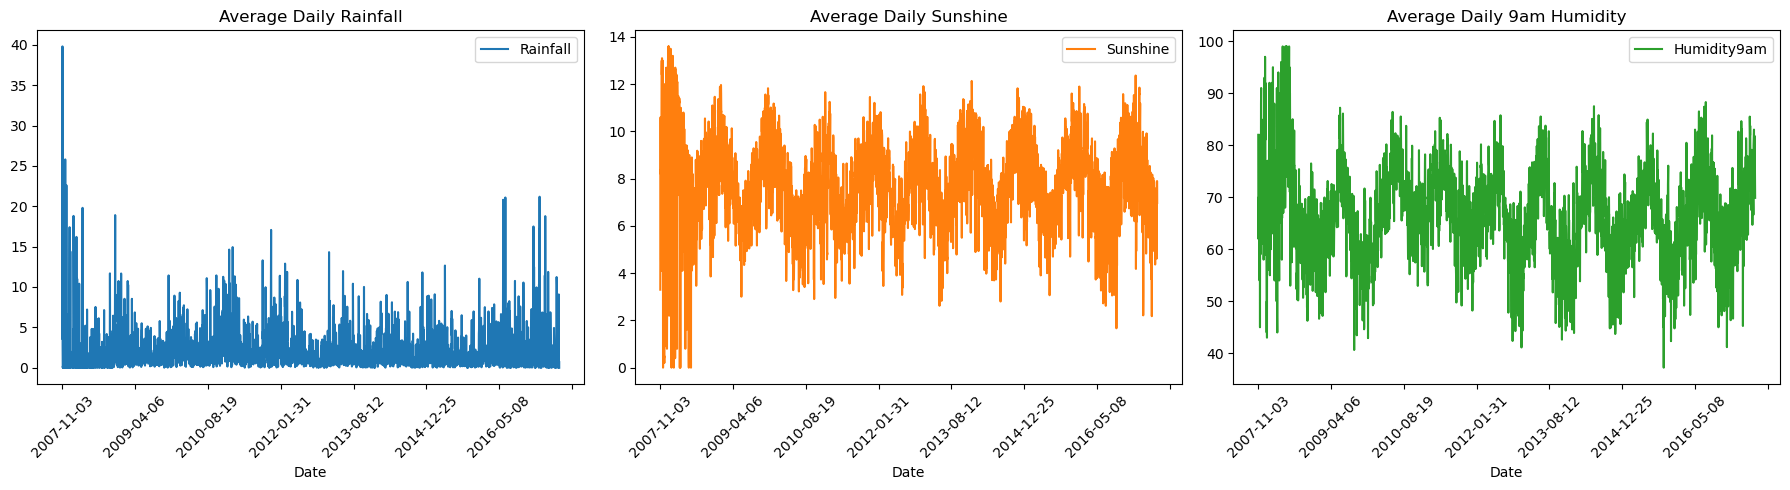

In [ ]:
# Time series overview
#Aggregate by Date
ts_df = (
    df
    .groupby('Date')[['Rainfall', 'Sunshine', 'Humidity9am']]
    .mean()
    .sort_index()
)
axes = ts_df.plot(
    subplots=True,            
    layout=(1, 3),            
    figsize=(18, 5),          
    sharex=True,              
    rot=45,                   
    title=[
        'Average Daily Rainfall',
        'Average Daily Sunshine',
        'Average Daily 9am Humidity'
    ]
)
plt.tight_layout()
plt.show()